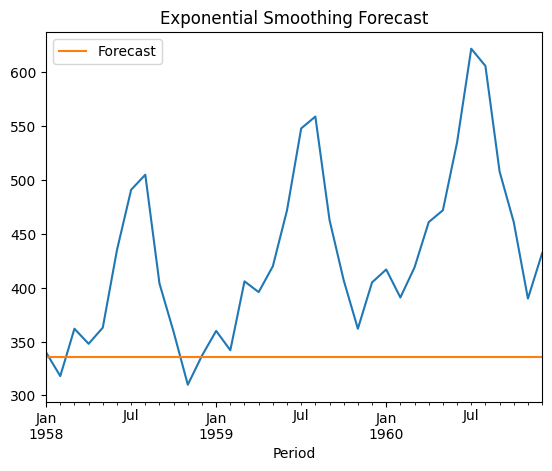

In [1]:
from sktime.datasets import load_airline
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
import matplotlib.pyplot as plt

# Load data
y = load_airline()

# Split into train and test
y_train, y_test = temporal_train_test_split(y)

# Create forecasting horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Initialize and train model
model = ExponentialSmoothing()
model.fit(y_train)

# Make predictions
y_pred = model.predict(fh)

# Plot results
y_test.plot(label="True")
y_pred.plot(label="Forecast", legend=True)
plt.title("Exponential Smoothing Forecast")
plt.show()


In [2]:

from sktime.datasets import load_airline
...


In [3]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 94.94


Text(0, 0.5, 'Passengers')

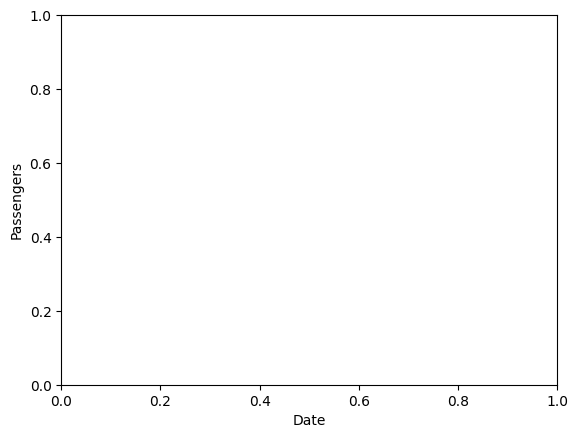

In [4]:
plt.xlabel("Date")
plt.ylabel("Passengers")


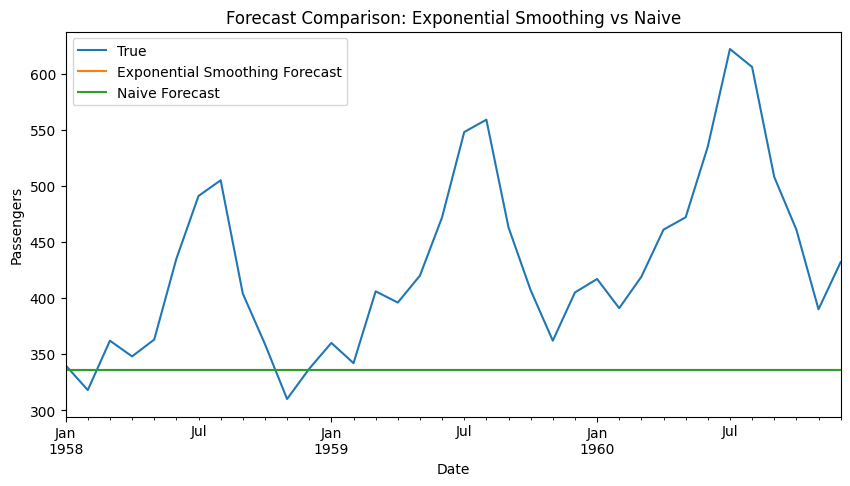

In [6]:

from sktime.forecasting.naive import NaiveForecaster

naive = NaiveForecaster(strategy="last")
naive.fit(y_train)
naive_pred = naive.predict(fh)

# Plotting true vs both forecasts
y_test.plot(label="True", figsize=(10, 5))
y_pred.plot(label="Exponential Smoothing Forecast")
naive_pred.plot(label="Naive Forecast", legend=True)
plt.title("Forecast Comparison: Exponential Smoothing vs Naive")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()


In [7]:
from sklearn.metrics import mean_absolute_error

mae_exp = mean_absolute_error(y_test, y_pred)
mae_naive = mean_absolute_error(y_test, naive_pred)

print(f"MAE - Exponential Smoothing: {mae_exp:.2f}")
print(f"MAE - Naive Forecast: {mae_naive:.2f}")


MAE - Exponential Smoothing: 94.94
MAE - Naive Forecast: 94.94
